# Meshing library examples

Imports

In [43]:
from mesh_lib import *
import numpy as np

Set domain

In [44]:
domain = [(0,0), (1,0), (1,1), (0,1)]

Generate basic mesh and compare

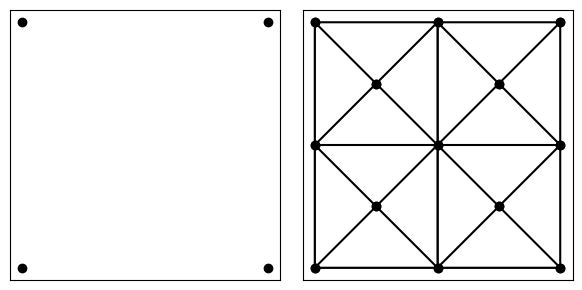

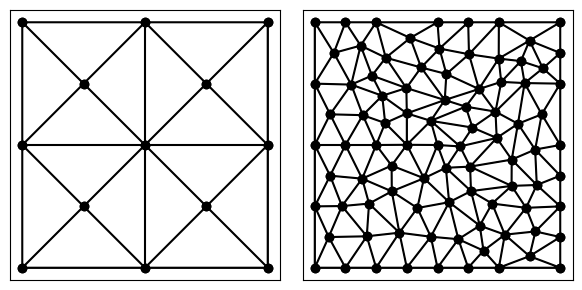

In [45]:
mesh_coarse = Mesh(domain)
mesh_coarse.generate_mesh(h=0.1)

mesh_fine = Mesh(domain)
mesh_fine.generate_mesh(h=0.01)

mesh_coarse.compare()
mesh_coarse.compare(mesh_fine)


Evaluate (roughly) the mesh

In [46]:
# print(f'Max. edge length: {mesh_coarse.max_H()}')
# print(f'Min. edge length: {mesh_coarse.min_H()}')

# print(f'Max. edge length: {mesh_fine.max_H()}')
# print(f'Min. edge length: {mesh_fine.min_H()}')

Generate basic mesh (specify max. edge length)

In [47]:
# mesh = Mesh(domain)
# a = mesh.specify_edge_length(h = 0.1)
# mesh.generate_mesh(h=a)
# mesh.compare()

Create a sub-mesh on a single element

[[ 4 12]
 [12  9]
 [ 9  4]
 [ 8  4]
 [ 4  5]
 [ 5  8]
 [10  7]
 [ 7  3]
 [ 3 10]
 [ 3  5]
 [ 5 10]
 [ 4  6]
 [ 6 12]
 [ 8  6]
 [ 0  6]
 [ 8  0]
 [11  2]
 [ 2  7]
 [ 7 11]
 [ 5  0]
 [ 9  2]
 [11  9]
 [ 4  7]
 [10  4]
 [11  4]
 [ 1  9]
 [12  1]
 [ 6  1]]
[[0, 1], [0, 4], [1, 4], [1, 5], [4, 5], [1, 2], [2, 5], [2, 6], [5, 6], [2, 3], [3, 6], [4, 7], [5, 7], [5, 8], [7, 8], [6, 8], [7, 9], [8, 9]]


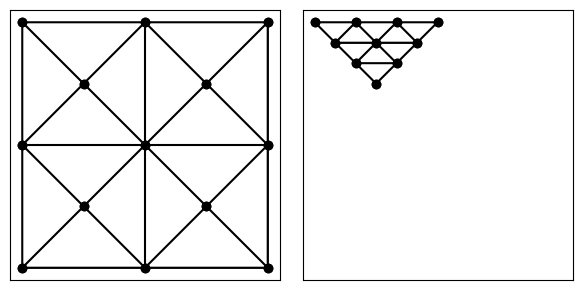

In [48]:
mesh = Mesh(domain, H = 0.1)
sub_mesh = mesh.generate_sub_mesh(element=2, N=4)
print(mesh.mesh["edges"])
print(sub_mesh.mesh["edges"])
mesh.compare(sub_mesh)

Create a sub-mesh over all elements

Refinement ratio: 0.11785113019775766


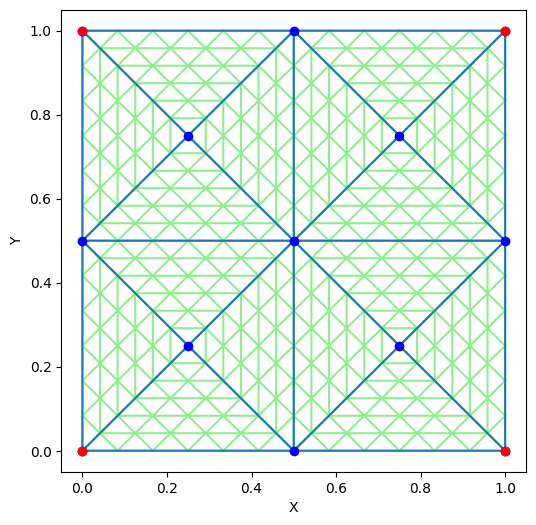

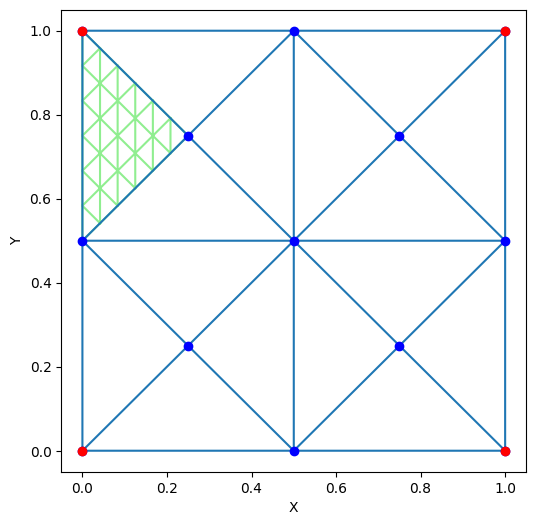

Max. edge length: H_max = 0.5
Min. edge length: H_min = 0.3535533905932738
Min. edge length (sub_mesh): h_min = 0.05892556509887883


In [49]:
mesh = Mesh(domain)
mesh.generate_full_mesh(0.1, 7)
print(f"Refinement ratio: {mesh.get_refinement_ratio()}")

# Plot all sub-elements
mesh.plot_sub_mesh()

# Plot specified elements
mesh.plot_sub_mesh([3])

print(f'Max. edge length: H_max = {mesh.max_H()}')
print(f'Min. edge length: H_min = {mesh.min_H()}')
print(f'Min. edge length (sub_mesh): h_min = {mesh.min_h()}')

Show translation of nodes/points from the reference triangle to arb. triangles

In [50]:
# nodes, weights = mesh.GLQ()
# points = mesh._get_element_points(6)
# translated_points, J = mesh.translate(nodes, points)

# print(f"Determinant: {J}")

# plt.triplot([0, 1, 0], [0, 0, 1])
# plt.scatter(nodes[:,0], nodes[:,1], c='r')
# plt.show()

# plt.triplot(points[:,0], points[:,1])
# plt.scatter(translated_points[:,0], translated_points[:,1], c='r')
# plt.show()

Integration example

In [51]:
# from time import time

# def f(x):
#     return np.square(x[:,0]+x[:,1])

# mesh = Mesh(domain)
# mesh.generate_mesh(0.01)

In [52]:
# %%timeit
# I, i = mesh.integrate(f)

In [53]:
# print(f"Result: {i}")
# print(f"Error = {7/6 - i}")
# mesh.convergence(f, 7/6)

Check we can match vertices of finer mesh along the edges of the coarser mesh


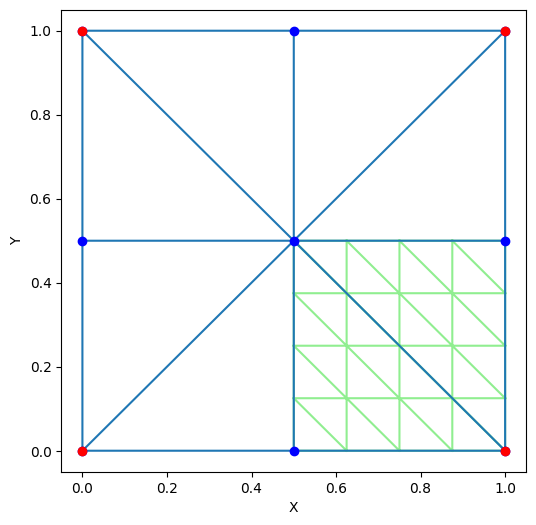

In [54]:
mesh = Mesh(domain, H = 0.2, N = 5)
mesh.plot_sub_mesh([6, 5])





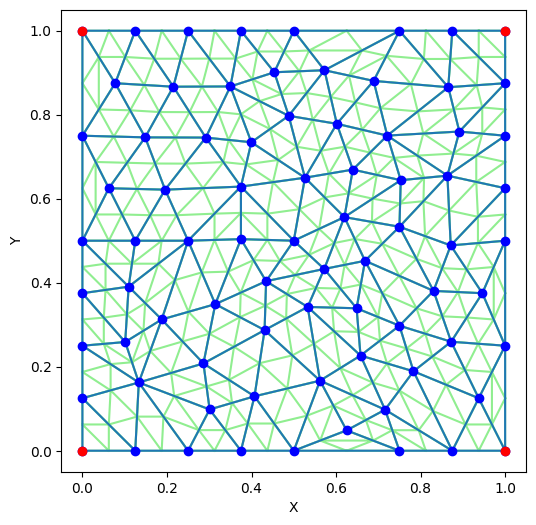

0.09851267733191653
0.04925633866595823


In [55]:
mesh = Mesh(domain, H = 0.012, N = 3)
mesh.plot_sub_mesh()

print(mesh.min_H())
print(mesh.min_h())


In [56]:
print(mesh._get_element_points(0))

[[0.52646889 0.65002551]
 [0.61973434 0.55622305]
 [0.63968997 0.66933143]]


In [57]:
print(mesh.meshed_elements[0]._get_vertices())

[[0.52646889 0.65002551]
 [0.57310162 0.60312428]
 [0.61973434 0.55622305]
 [0.58307943 0.65967847]
 [0.62971216 0.61277724]
 [0.63968997 0.66933143]]


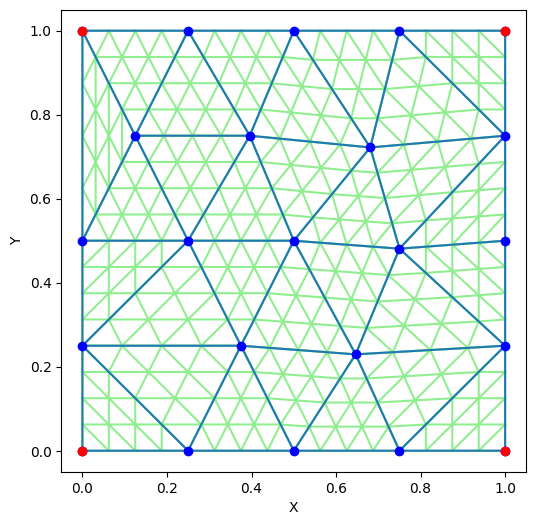

In [58]:
mesh = Mesh(domain, H = 0.05, N = 5)
mesh.plot_sub_mesh()

# print("Vertices of sub mesh:")
# print(mesh.meshed_elements[0].mesh['vertices'])

# print("Vertex markers:")
# print(mesh.meshed_elements[0].mesh['vertex_markers'])

# print("Edges of sub mesh:")
# print(mesh.meshed_elements[0].mesh['edges'])

# print("Edge markers:")
# print(mesh.meshed_elements[0].mesh['edge_markers'])

# print("Edge ids:")
# print(mesh.meshed_elements[0].mesh['edge_ids'])

# print("Flipped:")
# print(mesh.meshed_elements[0].mesh['flipped'])




In [59]:
import pandas as pd; pd.options.mode.chained_assignment = None; pd.set_option('display.max_columns', 500)

def process_dup(df):

    a = df.duplicated(subset=['x', 'y'], keep='last')
    b = df.duplicated(subset=['x', 'y'], keep='first')

    A = df.big_triangle_id[a].tolist()
    B = df.big_triangle_id[b].tolist()

    c = [A[i] + B[i] for i in range(len(A))]

    d = df.index[a]

    df['big_triangle_id'][d] = c
    df.drop_duplicates(subset=['x', 'y'], keep='first', inplace=True)
    return df.reset_index(drop=True)
    
nodes_df = pd.DataFrame(columns=['local_id','x', 'y', 'big_triangle_id'])

for big_triangle_id in range(0, mesh.N):
    x = np.round(mesh.meshed_elements[big_triangle_id].mesh['vertices'][:,0], 6)
    y = np.round(mesh.meshed_elements[big_triangle_id].mesh['vertices'][:,1], 6)

    temp_df = pd.DataFrame({'local_id':np.arange(0,len(x),1),'x':x, 'y':y, 'big_triangle_id':[[big_triangle_id]]*len(x)})
    nodes_df = pd.concat([nodes_df,temp_df])
    nodes_df.reset_index(drop=True, inplace=True)
    nodes_df = process_dup(nodes_df)

boundary = (nodes_df.x == 0) + (nodes_df.x == 1) + (nodes_df.y==0) + (nodes_df.y ==1)
nodes_df['boundary'] = boundary  

g = lambda x: len(x)

a = (np.array(list(map(g, nodes_df.big_triangle_id.values))) > 1) + boundary
nodes_df['internal'] = ~a
print(nodes_df)


    local_id         x         y          big_triangle_id  boundary  internal
0          0  0.680871  0.722064  [0, 10, 18, 19, 20, 27]     False     False
1          1  0.760653  0.729048                  [0, 27]     False     False
2          2  0.840436  0.736032                  [0, 27]     False     False
3          3  0.920218  0.743016                  [0, 27]     False     False
4          4  1.000000  0.750000          [0, 15, 21, 27]      True     False
..       ...       ...       ...                      ...       ...       ...
258        7  0.857718  0.675783                     [27]     False      True
259       10  0.777936  0.668799                     [27]     False      True
260        6  0.786591  0.119858                     [28]     False      True
261        7  0.849091  0.182358                     [28]     False      True
262       10  0.760682  0.177216                     [28]     False      True

[263 rows x 6 columns]


In [60]:
edges_df = pd.DataFrame(columns=['local_id','nodes','big_triangle_id'])


def find_global_id_edge(edge, df):
    res = []
    for coord in edge:
        a = df[['x', 'y']].values
        b = np.argwhere(np.round(coord,6) == a)[:,0]
        u, c = np.unique(b, return_counts=True)
        id = u[c > 1]
        res.append(int(id))

    return res

def process_dup_edges(df):
    
    df['nodes'] = list(map(np.sort, df.nodes.values))
    df['nodes'] = df.nodes.apply(lambda x : tuple(x))
    a = df.nodes.duplicated(keep = 'last')
    b = df.nodes.duplicated(keep = 'first')

    A = df.big_triangle_id[a].tolist()
    B = df.big_triangle_id[b].tolist()

    c = [A[i] + B[i] for i in range(len(A))]

    d = df.index[a]
    df['big_triangle_id'][d] = c

    df = df.drop_duplicates(subset='nodes', keep='first').reset_index(drop=True)
    return df

for big_triangle_id in range(0, mesh.N):

    element = mesh.meshed_elements[big_triangle_id].mesh

    local_edges = element['edges']
    local_edges = element['vertices'][local_edges]

    local_edges = [find_global_id_edge(a, nodes_df) for a in local_edges]

    temp_df = pd.DataFrame({'local_id':np.arange(0,len(local_edges),1),
                            'nodes':local_edges,
                            'big_triangle_id':[[big_triangle_id]]*len(local_edges)})


    edges_df = pd.concat([edges_df, temp_df])
    edges_df.reset_index(drop=True, inplace=True)

    edges_df = process_dup_edges(edges_df)

print(edges_df.to_string())






    local_id       nodes big_triangle_id
0          0      (0, 1)         [0, 27]
1          1      (0, 5)         [0, 20]
2          2      (1, 5)             [0]
3          3      (1, 6)             [0]
4          4      (5, 6)             [0]
5          5      (1, 2)         [0, 27]
6          6      (2, 6)             [0]
7          7      (2, 7)             [0]
8          8      (6, 7)             [0]
9          9      (2, 3)         [0, 27]
10        10      (3, 7)             [0]
11        11      (3, 8)             [0]
12        12      (7, 8)             [0]
13        13      (3, 4)         [0, 27]
14        14      (4, 8)         [0, 21]
15        15      (5, 9)         [0, 20]
16        16      (6, 9)             [0]
17        17     (6, 10)             [0]
18        18     (9, 10)             [0]
19        19     (7, 10)             [0]
20        20     (7, 11)             [0]
21        21    (10, 11)             [0]
22        22     (8, 11)         [0, 21]
23        23    

In [61]:
triangles_df = pd.DataFrame(columns=['local_id', 'nodes', 'edges', 'big_triangle_id'])

def find_global_id_triangle(triangle, df):
    res = []
    for coord in triangle:
        a = df[['x', 'y']].values
        b = np.argwhere(np.round(coord,6) == a)[:,0]
        u, c = np.unique(b, return_counts=True)
        id = u[c > 1]
        res.append(int(id))

    return res

def add_edges(nodes, edges_df):
    n = list(nodes)
    n = np.sort(n + n)
    n = n[[0, 3, 1, 4, 2, 5]]
    n = n.reshape((3,2))

    edge_ids = [edges_df.nodes[edges_df.nodes == tuple(node)].index[0] for node in n]
    return edge_ids
    

for big_triangle_id in range(0, mesh.N):
    element = mesh.meshed_elements[big_triangle_id].mesh

    local_triangles = element['triangles']
    local_triangles = element['vertices'][local_triangles]

    local_triangles = [find_global_id_triangle(a, nodes_df) for a in local_triangles]

    temp_df = pd.DataFrame({'local_id':np.arange(0,len(local_triangles),1),
                            'nodes':local_triangles,
                            'big_triangle_id':big_triangle_id})


    triangles_df = pd.concat([triangles_df, temp_df])
    triangles_df.reset_index(drop=True, inplace=True)


edges = [add_edges(triangles_df.nodes.values[i], edges_df) for i in triangles_df.index]
triangles_df['edges'] = edges
print(triangles_df.to_string())

    local_id            nodes            edges big_triangle_id
0          0        [0, 1, 5]        [0, 1, 2]               0
1          1        [1, 6, 5]        [2, 3, 4]               0
2          2        [1, 2, 6]        [5, 3, 6]               0
3          3        [2, 7, 6]        [6, 7, 8]               0
4          4        [2, 3, 7]       [9, 7, 10]               0
5          5        [3, 8, 7]     [10, 11, 12]               0
6          6        [3, 4, 8]     [13, 11, 14]               0
7          7        [5, 6, 9]      [4, 15, 16]               0
8          8       [6, 10, 9]     [16, 17, 18]               0
9          9       [6, 7, 10]      [8, 17, 19]               0
10        10      [7, 11, 10]     [19, 20, 21]               0
11        11       [7, 8, 11]     [12, 20, 22]               0
12        12      [9, 10, 12]     [18, 23, 24]               0
13        13     [10, 13, 12]     [24, 25, 26]               0
14        14     [10, 11, 13]     [21, 25, 27]         

In [62]:
res = []
for i in nodes_df.index:
    in_res = []
    for j in triangles_df.index:
        if i in triangles_df.nodes.values[j]:
            in_res.append(j)
    res.append(in_res)

nodes_df['lil_triangle_id'] = res

print(nodes_df.to_string())
    

    local_id         x         y          big_triangle_id  boundary  internal                 lil_triangle_id
0          0  0.680871  0.722064  [0, 10, 18, 19, 20, 27]     False     False    [0, 175, 294, 319, 320, 447]
1          1  0.760653  0.729048                  [0, 27]     False     False        [0, 1, 2, 445, 446, 447]
2          2  0.840436  0.736032                  [0, 27]     False     False        [2, 3, 4, 442, 443, 446]
3          3  0.920218  0.743016                  [0, 27]     False     False        [4, 5, 6, 437, 438, 443]
4          4  1.000000  0.750000          [0, 15, 21, 27]      True     False              [6, 246, 342, 438]
5          5  0.698153  0.791548                  [0, 20]     False     False        [0, 1, 7, 320, 321, 322]
6          6  0.777936  0.798532                      [0]     False      True              [1, 2, 3, 7, 8, 9]
7          7  0.857718  0.805516                      [0]     False      True            [3, 4, 5, 9, 10, 11]
8         

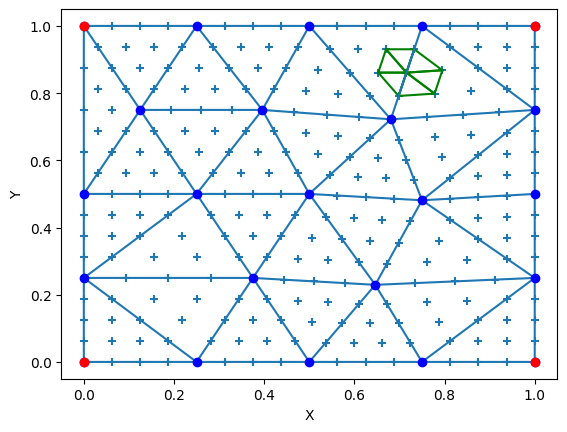

In [66]:
def plot_point(n: int) -> None:
    plt.figure()

    plt.scatter(nodes_df.x.values, nodes_df.y.values, marker='+')

    plt.plot(
        mesh._get_vertices()[:, 0], mesh._get_vertices()[:, 1], "bo"
    )  # Plot element vertices as blue dots

    to_plot = nodes_df.lil_triangle_id[n]
    to_plot = triangles_df.nodes[to_plot]

    for lil_triangle in to_plot:
        x = nodes_df.x[lil_triangle]
        y = nodes_df.y[lil_triangle]
        plt.triplot(x, y, color="green")



    # for element in to_plot:
    #     plt.triplot(
    #         (self.meshed_elements[element])._get_vertices()[:, 0],
    #         (self.meshed_elements[element])._get_vertices()[:, 1],
    #         (self.meshed_elements[element])._get_elements(),
    #         color="lightgreen",
    #     )

    plt.triplot(
        mesh._get_vertices()[:, 0],
        mesh._get_vertices()[:, 1],
        mesh._get_elements(),
    )

    plt.plot(
        mesh.domain["vertices"][:, 0], mesh.domain["vertices"][:, 1], "ro"
    )  # Plot original vertices as red dots

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

plot_point(9)